ゼロから作るDeepLeaning 教科書サンプルコード   
https://github.com/oreilly-japan/deep-learning-from-scratch

教科書サンプルコードを一部使用するので，作業ディレクトリにch03とdatasetを移しておいてください．

# Section.2 Perceptron

パーセプトロン
<img src="./fig/courses204_001.gif">

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<img src="./fig/andgate.png">

In [2]:
# AND Gate adding bias and weight
def AND(x1, x2):
    x = np.array([x1, x2]) # input
    w = np.array([0.5, 0.5]) # weight
    b = -0.7 # bias
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
AND(0.8,0.8)

1

<img src="./fig/NANDgate.gif">

In [4]:
# NAND Gate adding bias and weight
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
NAND(0.1,0.1)

1

In [6]:
# OR Gate adding bias and weight
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
OR(0,1)

1

パーセプトロンにおいて

+ 直線でわけられるような領域を**線形**
+ 曲線でわけられるような領域を**非線形**

という．

ANDやNAND,ORは線形分離が可能だったが，XORは線形分離が不可能．

そこでパーセプトロンの**層を重ねる**ことができることを利用して，XOR Gateの問題を別視点から考える．

つまりANDやNAND，ORを組み合わせてやることでXORを実現しようということ．

In [8]:
def XOR(x1, x2):
    s1 = NAND(x1, x2) # 第0層
    s2 = OR(x1, x2) # 第1層
    y = AND(s1, s2) # 第2層
    return y

In [9]:
XOR(1, 1)

0

### まとめ
+ パーセプトロンを用いることで論理回路を表現することができる
+ 2層のパーセプトロン，多層パーセプトロンによって(理論上)コンピュータの表現のすべてを行うことができる．

## Section.3 Neural Network

In [10]:
# step function
def step_function(x):
    return np.array(x>0, dtype=np.int)

(-0.1, 1.1)

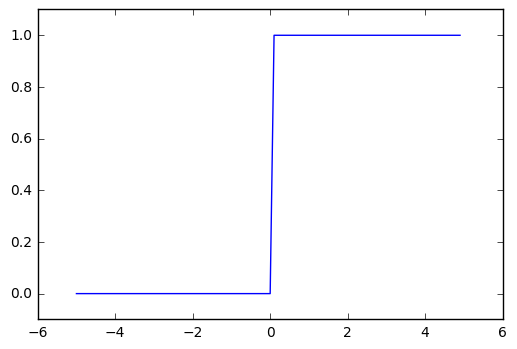

In [11]:
# draw step function graph
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)

In [12]:
# sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

(-0.1, 1.1)

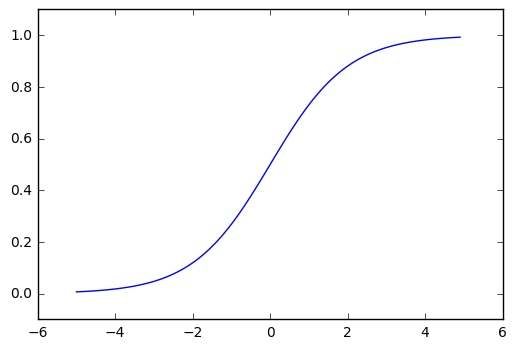

In [13]:
# draw sigmoid graph
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)

In [14]:
# ReLU(Rectified Liner Unit) function
def ReLU(x):
    return np.maximum(0,x)

(-1.0, 5.5)

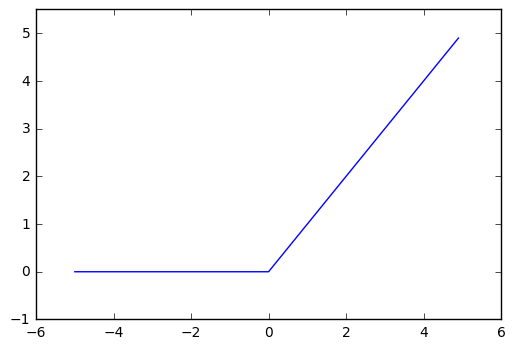

In [15]:
# draw ReLU graph
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.ylim(-1.0,5.5)

### 多次元配列の計算

In [16]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [17]:
np.ndim(A) #次元数(dimension)

1

In [18]:
A.shape

(4,)

In [19]:
A.shape[0] #0行目の列数

4

In [20]:
B = np.array([[1,2], [3,4],[5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [21]:
np.ndim(B)

2

In [22]:
B.shape #3行2列の行列

(3, 2)

#### 行列の内積

In [23]:
A = np.array([[1,2], [3,4]])

In [24]:
A.shape #2行2列の行列

(2, 2)

In [25]:
B = np.array([[5,6], [7,8]])

In [26]:
B.shape

(2, 2)

In [27]:
np.dot(A, B) # 行列の掛け算

array([[19, 22],
       [43, 50]])

In [28]:
np.dot(B,A) # AとBのかけ合わせ方が違うと答えが違うのが行列の掛け算

array([[23, 34],
       [31, 46]])

In [29]:
C = np.array([[1,2],[3,4],[5,6]])

In [30]:
C.shape

(3, 2)

In [31]:
np.dot(C, A) #2*[2 * 2]*3 => 2*3 ※次元の要素数が一致している

array([[ 7, 10],
       [15, 22],
       [23, 34]])

In [32]:
np.dot(A, C) #2*[3 * 2]*2 => ✗ ※次元の要素数が一致しないからエラーを吐く

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

#### ニューラルネットワークの内積

In [ ]:
X = np.array([1,2])

In [ ]:
X.shape

In [ ]:
W = np.array([[1,3,5],[2,4,6]])

In [ ]:
W.shape

In [ ]:
Y = np.dot(X, W)
Y

行列を使うことで数字の計算をEnter一回でできるから複雑な掛け合わせの計算に非常に便利

### 3層ニューラルネットワークの実装

In [ ]:
X = np.array([1.0, 0.5])  #1行2列の行列
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2行3列の行列
B1 = np.array([0.1, 0.2, 0.3]) # 1行3列の行列

In [ ]:
A1 = np.dot(X, W1) + B1 #次元の要素数が一致しているので計算ができる
A1

$$\begin{pmatrix} 1.0 & 0.5 \end{pmatrix} × \begin{pmatrix} 0.1 & 0.3 & 0.5 \\ 0.2 & 0.4 & 0.6 \end{pmatrix} + \begin{pmatrix} 0.1 & 0.2 & 0.3 \end{pmatrix}$$

In [ ]:
Z1 = sigmoid(A1) #シグモイド関数で活性化
Z1 # 1行3列

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #2行3列
B2 = np.array([0.1, 0.2]) # 1行2列

In [ ]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [ ]:
# identityfunction
def identity_function(x):
    return x

In [ ]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [ ]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
A3

### 出力層の設計

+ ソフトマックス関数を用いることでその出力を**確率**と捉えることができる．

In [ ]:
# softmax function
# but overflow
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # counter step overflow(オーバーフロー対策)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

In [ ]:
y

In [ ]:
np.sum(y)

### 手書き数字認識

まずは一番上にあるリンクからdatasetのデータをダウンロードして実行環境に保存する    
Macなら
```
git clone https://github.com/oreilly-japan/deep-learning-from-scratch/
```

Winなら Download ZIP でダウンロードして作業環境に展開しよう

In [ ]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

In [ ]:
from PIL import Image
import pickle # 後に使う．ローカルに保存したpickleファイルの読み込みを行うので処理が高速化できる

In [ ]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [ ]:
img = x_train[0]
label = t_train[0]
print(label) # 5
print(img.shape) # (784,)
img = img.reshape(28, 28) # 形状を元の画像サイズに変形 print(img.shape) # (28, 28)
img_show(img)

#### ニューラルネットワークの推論処理

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

#### バッチ処理

In [ ]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))